<a href="https://colab.research.google.com/github/tommycwong/TEM_HeliumBubbles/blob/master/CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

In [2]:
# Create an input layer
inputs = Input(shape=(256, 256, 1))
# Convolutional layer with ReLU activation
c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
# Convolutional layer with ReLU activation
c2 = Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
# Max-pooling layer (reduce size by a factor of 2)
p1 = MaxPooling2D((2, 2))(c2)
# Convolutional layer with ReLU activation
c3 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
# Convolutional layer with ReLU activation
c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(c3)
# Max-pooling layer (reduce size by a factor of 2)
p2 = MaxPooling2D((2, 2))(c4)
# Convolutional layer with ReLU activation
c5 = Conv2D(128, (3, 3), activation='relu',padding='same')(p2)
# Convolutional layer with ReLU activation
c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(c5)
# Upsampling (x2) with bilinear interpolation
s1 = UpSampling2D((2, 2), interpolation='bilinear')(c6)
#s1 = tf.keras.layers.concatenate([c4, s1])
# Convolutional layer with ReLU activation
c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(s1)
# Convolutional layer with ReLU activation
c8 = Conv2D(64, (3, 3), activation='relu', padding='same')(c7)
# Upsampling (x2) with bilinear interpolation
s2 = UpSampling2D((2, 2), interpolation='bilinear')(c8)
#s2 = tf.keras.layers.concatenate([c2, s2])
# Convolutional layer with ReLU activation
c9 = Conv2D(32, (3, 3), activation='relu', padding='same')(s2)
# Convolutional layer with ReLU activation
c10 = Conv2D(32, (3, 3), activation='relu', padding='same')(c9)
# Convolutional layer for classification (activation 'softmax')
outputs = Conv2D(1, (3, 3), activation='softmax')(c10)
# Instantiate model
model = Model(inputs, outputs)
# Compile model using binary crossentropy loss function and Adam optimizer
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


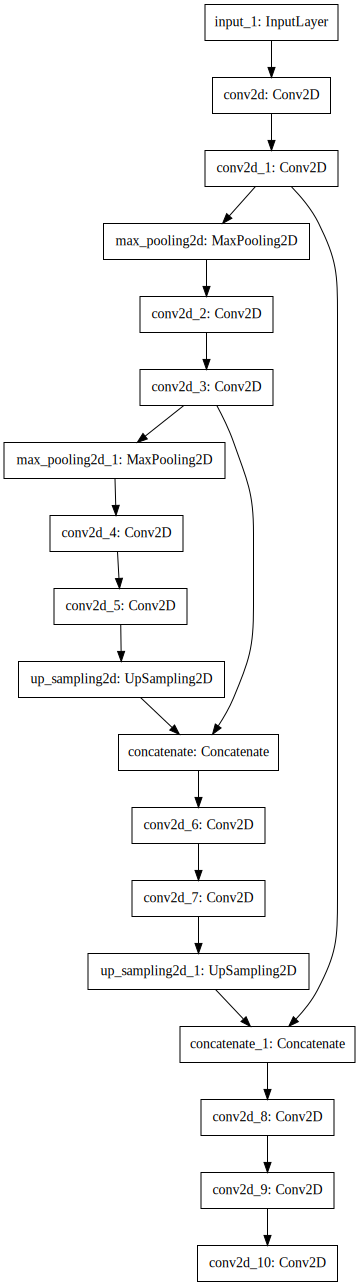

In [3]:
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
SVG(model_to_dot(model).create(prog='dot', format='svg'))